In [26]:
import requests,zipfile 
from io import StringIO 
import io 

#url
zip_file = 'https://archive.ics.uci.edu/ml/machine-learning-datases/00312/dow_jones_index.zip'
r = requests.get(zip_file)
z = zipfile.ZipFile(io.BytesIO(r.content))
#展開
z.extractall()

In [27]:
import pandas as pd 
data = pd.read_csv('dow_jones_index.data',sep=',')

In [28]:
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
quarter                               750 non-null int64
stock                                 750 non-null object
date                                  750 non-null object
open                                  750 non-null object
high                                  750 non-null object
low                                   750 non-null object
close                                 750 non-null object
volume                                750 non-null int64
percent_change_price                  750 non-null float64
percent_change_volume_over_last_wk    720 non-null float64
previous_weeks_volume                 720 non-null float64
next_weeks_open                       750 non-null object
next_weeks_close                      750 non-null object
percent_change_next_weeks_price       750 non-null float64
days_to_next_dividend                 750 non-null int64
percent_return_next_divi

In [30]:
data.date=pd.to_datetime(data.date)

In [31]:
delete_dolchar = lambda x: str(x).replace('$','')

In [32]:
#対象は,open,high,low,close,next_weexs_open,next_weeks_close
#文字型を数値型に変換する処理

data.open = pd.to_numeric(data.open.map(delete_dolchar))
data.high = pd.to_numeric(data.high.map(delete_dolchar))
data.low = pd.to_numeric(data.low.map(delete_dolchar))
data.close = pd.to_numeric(data.close.map(delete_dolchar))
data.next_weeks_open = pd.to_numeric(data.next_weeks_open.map(delete_dolchar))
data.next_weeks_close=pd.to_numeric(data.next_weeks_close.map(delete_dolchar))

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
quarter                               750 non-null int64
stock                                 750 non-null object
date                                  750 non-null datetime64[ns]
open                                  750 non-null float64
high                                  750 non-null float64
low                                   750 non-null float64
close                                 750 non-null float64
volume                                750 non-null int64
percent_change_price                  750 non-null float64
percent_change_volume_over_last_wk    720 non-null float64
previous_weeks_volume                 720 non-null float64
next_weeks_open                       750 non-null float64
next_weeks_close                      750 non-null float64
percent_change_next_weeks_price       750 non-null float64
days_to_next_dividend                 750 non-null int64
percent_re

In [34]:
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [35]:
data['stock'].describe()

count      750
unique      30
top       KRFT
freq        25
Name: stock, dtype: object

In [36]:
data_stock = data.set_index(['date','stock'])
data_stock

,,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,stock,,,,,,,,,,,,,,
2011-01-07,AA,1,15.82,16.72,15.78,16.42,239655616,3.792670,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
2011-01-14,AA,1,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2011-01-21,AA,1,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
2011-01-28,AA,1,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
2011-02-04,AA,1,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
2011-02-11,AA,1,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712
2011-02-18,AA,1,17.39,17.68,17.28,17.28,80023895,-0.632547,-30.226696,114691279.0,16.98,16.68,-1.766780,83,0.173611
2011-02-25,AA,1,16.98,17.15,15.96,16.68,132981863,-1.766780,66.177694,80023895.0,16.81,16.58,-1.368230,76,0.179856
2011-03-04,AA,1,16.81,16.94,16.13,16.58,109493077,-1.368230,-17.663150,132981863.0,16.58,16.03,-3.317250,69,0.180941


In [37]:
data_stock_unstack = data_stock.unstack()

data_stock_unstack

quarter                                    ...  \
stock           AA AXP BA BAC CAT CSCO CVX DD DIS GE  ...   
date                                                  ...   
2011-01-07       1   1  1   1   1    1   1  1   1  1  ...   
2011-01-14       1   1  1   1   1    1   1  1   1  1  ...   
2011-01-21       1   1  1   1   1    1   1  1   1  1  ...   
2011-01-28       1   1  1   1   1    1   1  1   1  1  ...   
2011-02-04       1   1  1   1   1    1   1  1   1  1  ...   
2011-02-11       1   1  1   1   1    1   1  1   1  1  ...   
2011-02-18       1   1  1   1   1    1   1  1   1  1  ...   
2011-02-25       1   1  1   1   1    1   1  1   1  1  ...   
2011-03-04       1   1  1   1   1    1   1  1   1  1  ...   
2011-03-11       1   1  1   1   1    1   1  1   1  1  ...   
2011-03-18       1   1  1   1   1    1   1  1   1  1  ...   
2011-03-25       1   1  1   1   1    1   1  1   1  1  ...   
2011-04-01       2   2  2   2   2    2   2  2   2  2  ...   
2011-04-08       2   2  2   2   2    2   2  2   2  2  ...   
2011-04-15       2   2  2   2   2    2   2  2   2  2  ...   
2011-04-21       2   2  2   2   2    2   2  2   2  2  ...   
2011-04-29       2   2  2   2   2    2   2  2   2  2  ...   
2011-05-06       2   2  2   2   2    2   2  2   2  2  ...   
2011-05-13       2   2  2   2   2    2   2  2   2  2  ...   
2011-05-20       2   2  2   2   2    2   2  2   2  2  ...   
2011-05-27       2   2  2   2   2    2   2  2   2  2  ...   
2011-06-03       2   2  2   2   2    2   2  2   2  2  ...   
2011-06-10       2   2  2   2   2    2   2  2   2  2  ...   
2011-06-17       2   2  2   2   2    2   2  2   2  2  ...   
2011-06-24       2   2  2   2   2    2   2  2   2  2  ...   

           percent_return_next_dividend                                \
stock                               MRK      MSFT       PFE        PG   
date                                                                    
2011-01-07                      1.01740  0.559441  1.090510  0.744186   
2011-01-14                      1.11014  0.565371  1.090510  0.732489   
2011-01-21                      1.12094  0.571021  1.089320  0.804127   
2011-01-28                      1.14908  0.576577  1.101930  0.825545   
2011-02-04                      1.15537  0.576161  1.036270  0.833202   
2011-02-11                      1.14908  0.587156  1.062130  0.818786   
2011-02-18                      1.15677  0.591279  1.042210  0.824261   
2011-02-25                      1.18049  0.602637  1.060450  0.843412   
2011-03-04                      1.14943  0.616570  1.017290  0.854425   
2011-03-11                      1.16101  0.623053  1.027220  0.861929   
2011-03-18                      1.19085  0.645161  0.991080  0.874587   
2011-03-25                      1.16672  0.624512  0.982801  0.870565   
2011-04-01                      1.14908  0.627944  0.981354  0.853737   
2011-04-08                      1.12860  0.613732  0.977517  0.856220   
2011-04-15                      1.10113  0.630666  0.974184  0.825802   
2011-04-21                      1.11633  0.626959  1.010610  0.837680   
2011-04-29                      1.05702  0.617284  0.953743  0.816641   
2011-05-06                      1.04424  0.618477  0.973236  0.812012   
2011-05-13                      1.02481  0.639233  0.956023  0.792701   
2011-05-20                      1.02536  0.653328  0.966651  0.786817   
2011-05-27                      1.04943  0.646204  0.955566  0.800604   
2011-06-03                      1.06086  0.669456  0.959693  0.810026   
2011-06-10                      1.07193  0.675106  0.994530  0.819165   
2011-06-17                      1.07375  0.659522  0.987167  0.819292   
2011-06-24                      1.09986  0.658436  0.996016  0.846781   

                                                                      
stock             T       TRV       UTX       VZ       WMT       XOM  
date                                                                  
2011-01-07  1.49047  0.675042  0.543753  1.3

In [38]:
#closeのみを対象とする
data_close = data_stock_unstack['close']
data_close

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2011-01-14,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2011-01-21,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
2011-01-28,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
2011-02-04,17.14,43.82,71.38,14.29,99.59,22.05,97.11,52.53,40.71,20.56,...,32.89,27.77,19.30,63.61,27.97,57.41,82.52,36.31,56.03,83.28
2011-02-11,17.37,46.75,72.14,14.77,103.54,18.70,96.45,54.58,43.41,21.33,...,33.07,27.25,18.83,64.73,28.47,58.99,85.20,36.39,55.69,82.82
2011-02-18,17.28,45.53,73.04,14.75,105.86,18.85,98.72,55.98,43.56,21.44,...,32.85,27.06,19.19,64.30,28.57,60.92,85.01,36.62,55.38,84.50
2011-02-25,16.68,43.53,72.30,14.20,102.00,18.64,102.10,54.07,42.95,20.82,...,32.19,26.55,18.86,62.84,28.13,59.60,83.37,35.97,51.75,85.34
2011-03-04,16.58,43.72,71.80,14.12,103.04,18.40,103.75,53.87,43.55,20.37,...,33.06,25.95,19.66,62.03,27.92,59.18,82.86,36.08,52.07,85.08


In [39]:
data_close.describe()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,16.504400,46.712400,73.448000,13.051600,103.152000,17.899200,101.175600,52.873600,41.249600,19.784000,...,34.360400,25.920800,19.821600,64.002000,29.626800,59.160000,84.033200,36.46960,53.912800,82.111600
std,0.772922,2.396248,3.087631,1.417382,6.218651,1.984095,5.267066,2.367048,1.882473,0.912022,...,1.666357,1.416407,0.915085,1.828795,1.369257,2.649218,2.985547,0.93282,1.555639,3.137743
min,14.720000,43.530000,69.100000,10.520000,92.750000,14.930000,91.190000,48.350000,37.580000,17.970000,...,31.910000,23.700000,18.150000,60.600000,27.490000,53.330000,79.080000,34.95000,51.520000,75.590000
25%,16.030000,44.360000,71.640000,11.930000,99.590000,16.880000,97.900000,50.290000,39.450000,19.250000,...,33.060000,24.800000,19.190000,62.590000,28.430000,57.920000,82.520000,35.84000,52.540000,79.780000
50%,16.520000,46.250000,72.690000,13.370000,103.540000,17.520000,102.100000,52.910000,41.520000,19.950000,...,34.040000,25.680000,20.110000,64.300000,30.340000,59.210000,83.520000,36.31000,53.660000,82.630000
75%,17.100000,48.500000,74.840000,14.250000,107.210000,18.700000,103.750000,54.630000,42.950000,20.360000,...,35.820000,27.060000,20.530000,65.270000,30.710000,61.180000,85.320000,37.26000,55.290000,84.500000
max,17.920000,51.190000,79.780000,15.250000,115.410000,22.050000,109.660000,56.790000,43.560000,21.440000,...,37.350000,28.600000,20.970000,67.360000,31.410000,63.430000,89.580000,38.47000,56.700000,87.980000


In [40]:
corr_data = data_close.corr()
corr_data

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


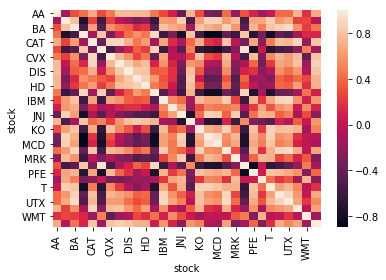

In [41]:
import seaborn as sns
sns.heatmap(corr_data)

In [44]:
#initial value 
max_corr = 0
stock_1 =''
stock_2 =''

for i in range(0,len(corr_data)):
    print(
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1],
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0],
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
    )
    if max_corr < corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]:
        max_corr = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
        stock_1 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1]
        stock_2 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0]

#max_corrのペアを出力
print('[Max Corr]:',max_corr)
print('[stock_1]:',stock_1)
print('[stock_2]:',stock_2)

AA DIS 0.7724697655620217
AXP KRFT 0.8735103611554016
BA UTX 0.9163379610743169
BAC HPQ 0.905816768000937
CAT DD 0.9028558103078954
CSCO MSFT 0.9537216645891367
CVX CAT 0.8894156562923723
DD CAT 0.9028558103078954
DIS DD 0.8269258130241479
GE HD 0.8582069310150247
HD GE 0.8582069310150247
HPQ BAC 0.905816768000937
IBM UTX 0.8975523835362526
INTC BA 0.6910939563691997
JNJ KRFT 0.8612879882611022
JPM GE 0.8304508594360389
KO T 0.8689952415835721
KRFT MCD 0.9299213037922904
MCD KRFT 0.9299213037922904
MMM UTX 0.9136955626526879
MRK JNJ 0.8440270438854454
MSFT CSCO 0.9537216645891367
PFE T 0.8065439446754139
PG MRK 0.7497131367292446
T KO 0.8689952415835721
TRV MMM 0.8917262016156647
UTX BA 0.9163379610743169
VZ CAT 0.8903147891825166
WMT PG 0.7237055485083298
XOM DD 0.8635107559399798
[Max Corr]: 0.9537216645891367
[stock_1]: CSCO
[stock_2]: MSFT


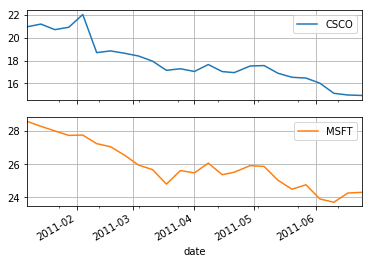

In [47]:
import matplotlib.pyplot as plt
data_subsets = data_close[[stock_1,stock_2]]
data_subsets.plot(subplots=True,grid=True)
plt.grid(True)